In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('../../data/process_v1/process_data_6.csv')
df

,numberOfFloors,numberOfBathRooms,numberOfBedRooms,certificateOfLandUseRight,ward,street,district,city,lat,lon,...,nearest_8_ward,distance_nearest_0,distance_nearest_1,distance_nearest_2,distance_nearest_3,distance_nearest_4,distance_nearest_5,distance_nearest_6,distance_nearest_7,distance_nearest_8
0,1,NaN,NaN,0,0,0,0,0,21.036403,105.727235,...,207.0,5.763842,6.163906,6.625483,6.902591,7.068264,7.244181,7.234741,7.263303,7.335576
1,5,5.0,4.0,1,1,1,1,0,20.985272,105.843605,...,162.0,5.344622,5.558940,5.666665,5.678318,6.172367,6.381466,6.450677,6.451070,6.489909
2,4,NaN,NaN,1,2,2,2,0,20.978546,105.796775,...,NaN,4.386321,6.332002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,7.0,7.0,1,3,3,3,0,21.028933,105.855453,...,NaN,4.744202,5.361315,5.435177,5.625682,5.748205,5.755464,NaN,NaN,NaN
4,4,NaN,NaN,1,4,4,4,0,21.046094,105.800236,...,8.0,5.630519,5.693591,6.114641,6.244196,6.311831,6.423785,6.490146,6.500025,6.591297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170959,1,2.0,2.0,0,119,600,9,0,21.001092,105.869070,...,119.0,5.476523,5.845523,5.958344,6.267626,6.313399,6.335890,6.338963,6.411076,6.651899
170960,6,10.0,10.0,0,231,358,11,0,20.999584,105.817799,...,96.0,5.500126,5.593771,5.674128,5.784006,5.991982,6.096160,6.057130,6.276572,6.281072
170961,8,22.0,22.0,1,164,574,10,0,21.029128,105.886118,...,79.0,4.963666,6.570718,6.683942,6.744535,7.010729,7.139913,7.087267,7.293691,7.328976
170962,5,NaN,NaN,1,35,125,15,0,21.017355,105.775199,...,174.0,5.233229,5.755187,6.184113,6.250902,6.252426,6.349551,6.788466,6.782641,6.858257


In [22]:
cat_cols = ['administrative_genre', 'city', 'ward', 'street', 'district', 'typeOfRealEstate', 'houseDirection', 'accessibility', 'certificateOfLandUseRight'] + [c for c in df.columns.tolist() if '_lat' in c or '_lon' in c]
target_cols = ['target']
remove_cols = ['price', 'description']
num_cols = [c for c in df.columns.tolist() if c not in (cat_cols + target_cols + remove_cols)]

cat_cols = list(set(cat_cols))
target_cols = list(set(target_cols))
remove_cols = list(set(remove_cols))
num_cols = list(set(num_cols))

print(len(cat_cols), len(target_cols), len(remove_cols), len(num_cols))

29 1 2 201


In [23]:
cat_cols

['nearest_0_lon',
 'nearest_2_lat',
 'district_lon',
 'nearest_3_lat',
 'nearest_8_lon',
 'nearest_2_lon',
 'district',
 'houseDirection',
 'nearest_6_lon',
 'nearest_7_lon',
 'nearest_0_lat',
 'typeOfRealEstate',
 'street',
 'district_lat',
 'nearest_5_lon',
 'nearest_5_lat',
 'nearest_6_lat',
 'accessibility',
 'certificateOfLandUseRight',
 'nearest_1_lon',
 'nearest_1_lat',
 'nearest_4_lon',
 'ward',
 'nearest_8_lat',
 'administrative_genre',
 'nearest_3_lon',
 'nearest_7_lat',
 'nearest_4_lat',
 'city']

In [24]:
num_cols

['num_of_kindergarten_in_1000m_radius',
 'distance_hcm_Công viên Tao Đàn',
 'distance_hn_GO! Thăng Long',
 'distance_hcm_Nguyễn Thị Minh Khai',
 'distance_hn_Vườn Hoa Pasteur',
 'distance_hcm_Đoàn Văn Bơ',
 'distance_hn_Hồ Tây 1',
 'distance_hn_Trung tâm thương mại Royal City Hà Nội',
 'endWidth',
 'distance_nearest_2',
 'num_of_townhall - community_centre_in_500m_radius',
 'distance_hn_WinMart',
 'distance_hn_Trung tâm thương mại Hà Nội Center Point',
 'nearest_0_ward',
 'nearest_8_district',
 'nearest_6_street',
 'nearest_8_street',
 'distance_hn_Aeon Mall Long Biên',
 'distance_hn_Công viên yên sở',
 'distance_hn_Lotte Center Hanoi',
 'num_of_fast_food_in_500m_radius',
 'distance_hcm_Đường Nguyễn Tất Thành',
 'num_of_bank_in_500m_radius',
 'lat',
 'distance_hn_Hồ Tây 7',
 'distance_hn_Công viên hòa bình',
 'distance_hn_Công viên Nghĩa Đô',
 'distance_hcm_Đường Đồng Khởi, quận 1, TPHCM',
 'distance_nearest_4',
 'nearest_1_street',
 'num_of_bank_in_1000m_radius',
 'num_of_fuel_in_2000

In [25]:
print(len(num_cols))

201


In [26]:
train_independent_corr = df[num_cols].corr()
train_seleted_corr_columns = np.full((train_independent_corr.shape[0],), True, dtype=bool)
for i in range(train_independent_corr.shape[0]):
    for j in range(i + 1, train_independent_corr.shape[0]):
        if train_independent_corr.iloc[i, j] >= 0.99:

            if train_seleted_corr_columns[j]:
                train_seleted_corr_columns[j] = False
train_selected_columns = df[num_cols].columns[train_seleted_corr_columns]
print(train_selected_columns.shape)

(165,)


In [27]:
# train_selected_columns = list(train_selected_columns)
train_selected_columns = num_cols

In [28]:
df[cat_cols] = df[cat_cols].fillna(100)
df[cat_cols] = df[cat_cols].astype(np.int32)

In [29]:
df = df[cat_cols + num_cols + target_cols]

In [30]:
df = df[df[target_cols[0]] != np.inf]
df = df[df[target_cols[0]] != -np.inf]

In [31]:
df = df[df[target_cols[0]] >= 10]

In [32]:
categorical_features_indices = [i for i, c in enumerate(df.columns.tolist()) if c in cat_cols]

In [33]:
X = df.drop(target_cols[0], axis=1)
y = np.log(df[target_cols[0]])

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.9, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)

(138845, 230) (138845,)
(15428, 230) (15428,)


In [35]:
from catboost import CatBoostRegressor, Pool, metrics, cv
from sklearn.metrics import accuracy_score

In [36]:
model = CatBoostRegressor(verbose=100)
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
    logging_level='Verbose',
    # plot=True
)

Learning rate set to 0.110477
0:	learn: 0.7360385	test: 0.7377531	best: 0.7377531 (0)	total: 48.1ms	remaining: 48.1s
100:	learn: 0.3379545	test: 0.3452897	best: 0.3452897 (100)	total: 5.95s	remaining: 52.9s
200:	learn: 0.3223491	test: 0.3323380	best: 0.3323380 (200)	total: 12s	remaining: 47.5s
300:	learn: 0.3140682	test: 0.3263136	best: 0.3263136 (300)	total: 18s	remaining: 41.7s
400:	learn: 0.3084263	test: 0.3226826	best: 0.3226826 (400)	total: 24.1s	remaining: 35.9s
500:	learn: 0.3040330	test: 0.3202135	best: 0.3202135 (500)	total: 30s	remaining: 29.9s
600:	learn: 0.3001144	test: 0.3182432	best: 0.3182432 (600)	total: 36s	remaining: 23.9s
700:	learn: 0.2969027	test: 0.3167437	best: 0.3167437 (700)	total: 42.1s	remaining: 18s
800:	learn: 0.2941063	test: 0.3153107	best: 0.3153107 (800)	total: 48.2s	remaining: 12s
900:	learn: 0.2915560	test: 0.3142612	best: 0.3142612 (900)	total: 54.2s	remaining: 5.96s
999:	learn: 0.2893736	test: 0.3132691	best: 0.3132691 (999)	total: 1m	remaining: 0us


In [37]:
feature_importances = pd.DataFrame(model.get_feature_importance(),columns=['importance'])
feature = pd.DataFrame(df.columns,columns=['feature'])
feature_importance_df = pd.concat([feature_importances,feature],axis=1)
feature_importance_df

,importance,feature
0,0.000000,nearest_0_lon
1,0.014834,nearest_2_lat
2,0.000000,district_lon
3,0.099276,nearest_3_lat
4,0.432465,nearest_8_lon
...,...,...
226,0.002567,distance_hn_Phố Hai Bà Trưng(Hoàn Kiếm)
227,0.918611,distance_hcm_Công viên Vinhomes Central Park
228,0.126569,num_of_parking_in_500m_radius
229,0.005620,distance_hcm_Bà Huyện Thanh Quan


Text(0.5, 1.0, 'Feature Importances ')

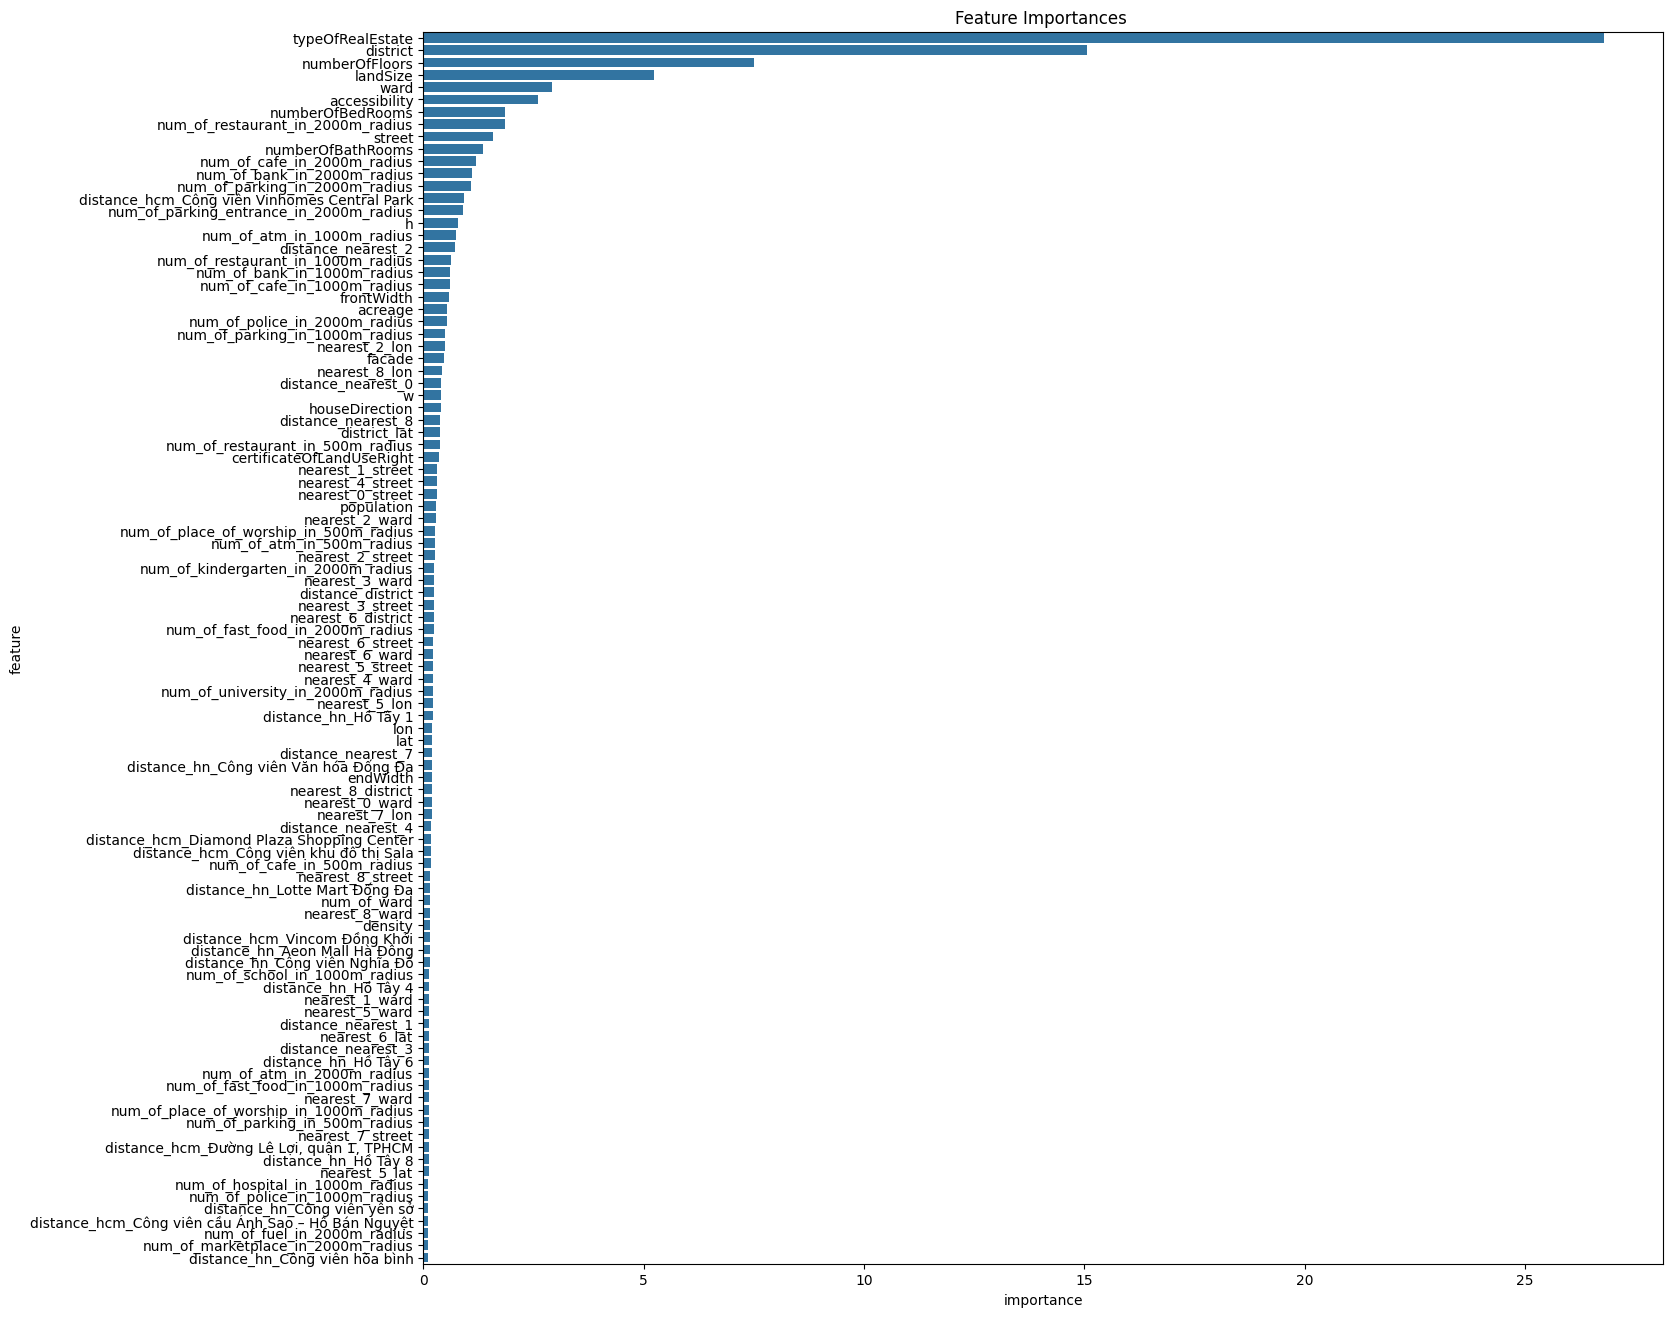

In [40]:
plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importance_df.sort_values(by='importance', ascending=False).head(100), x='importance', y='feature')
plt.title('Feature Importances ')